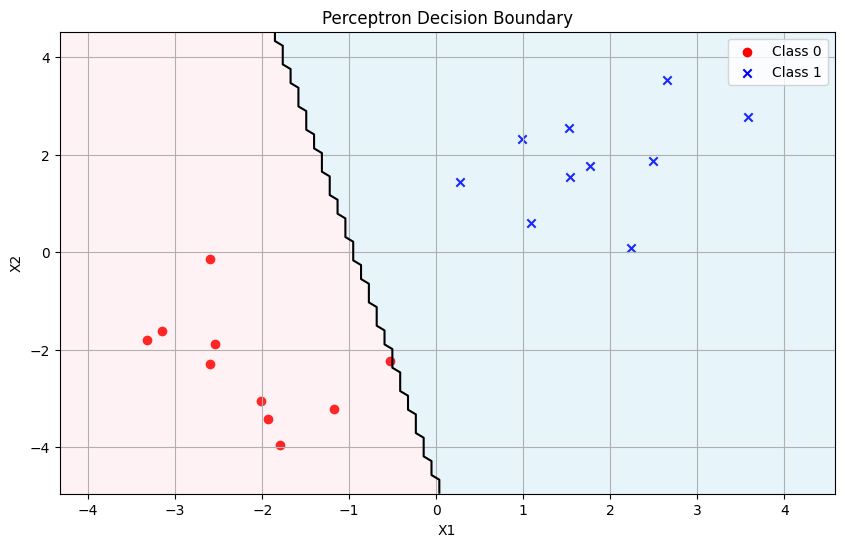

Seed: 42, Accuracy: 100.00%
Final weights: [0.57699256 0.11620439]
Final bias: 0.5476885381006924


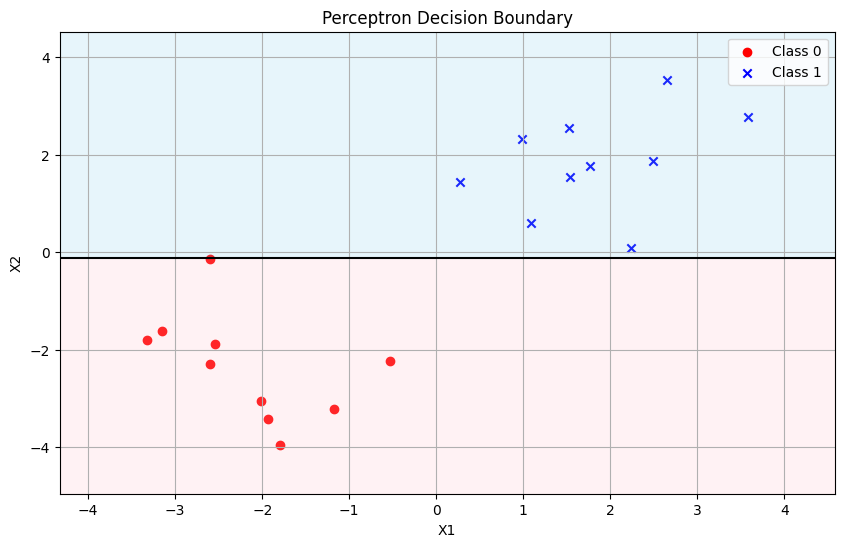

Seed: 123, Accuracy: 100.00%
Final weights: [1.53388250e-04 1.26479792e+00]
Final bias: 0.16297849805199194


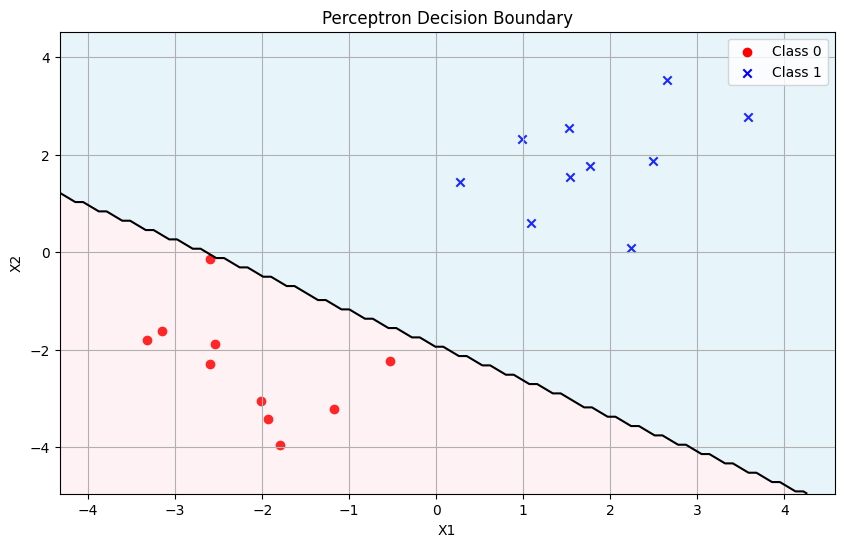

Seed: 456, Accuracy: 100.00%
Final weights: [0.17983499 0.24974544]
Final bias: 0.47857582027543677


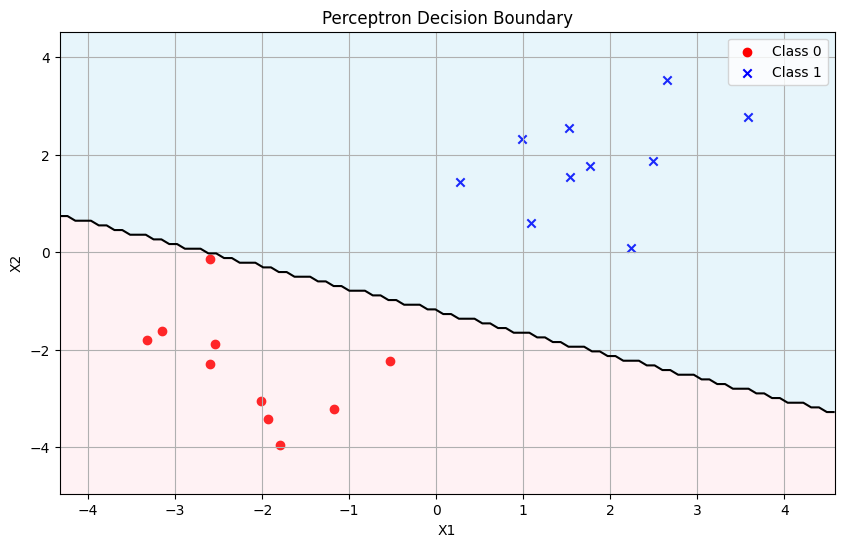

Seed: 789, Accuracy: 100.00%
Final weights: [0.14885171 0.32644388]
Final bias: 0.39280433495401734


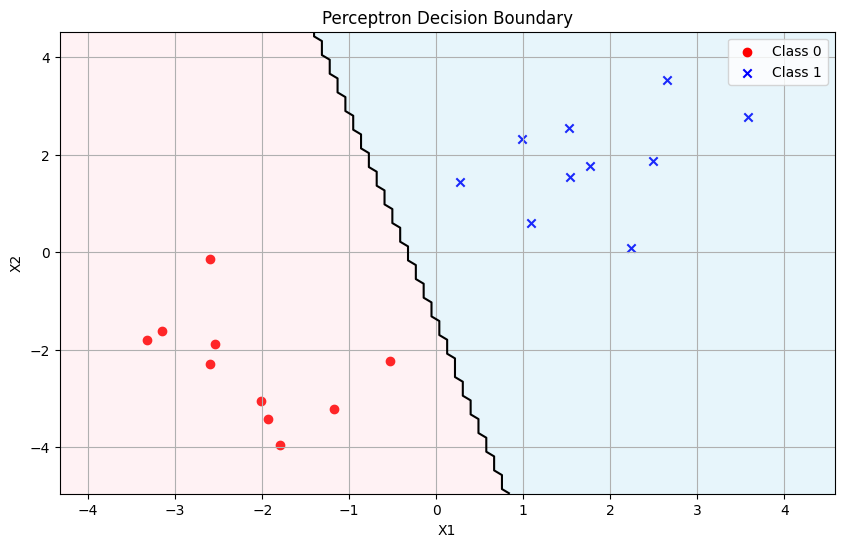

Seed: 101, Accuracy: 100.00%
Final weights: [2.70684984 0.62813271]
Final bias: 0.9079694464765431


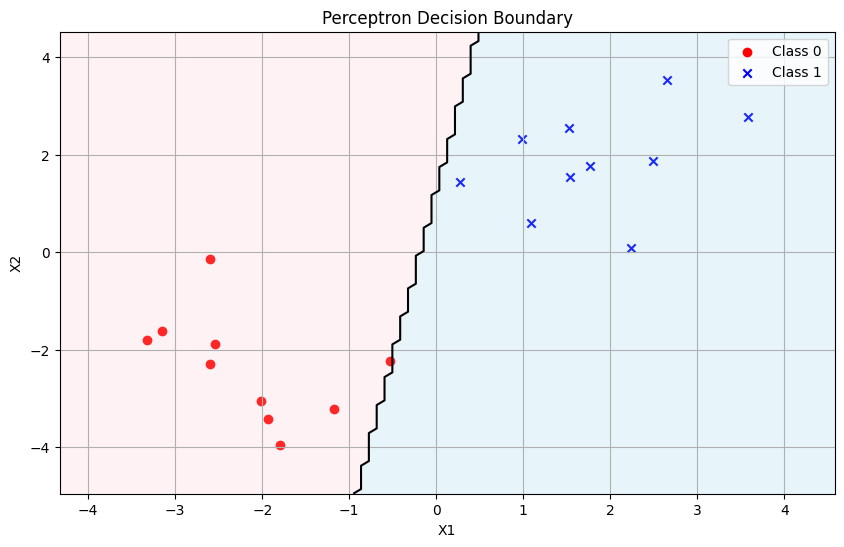

Seed: 112, Accuracy: 100.00%
Final weights: [ 1.86906833 -0.27490975]
Final bias: 0.3435133482108109


In [1]:
'''
230191
EE708 Assignment 5
QUESTION 7
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
data = pd.read_csv('A5_P1.csv')
X = data[['X1', 'X2']].values
y = data['y'].values

#Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=20):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def initialize_weights(self, n_features):
        #Random weight initialization
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

    def step(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #Initializing weights
        self.initialize_weights(n_features)

        #Training loop
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                #Forward pass
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step(linear_output)

                #Update weights using gradient descent
                error = y[idx] - y_predicted
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step(linear_output)

    def visualize_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))

        #Plotting the data points
        plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o', color='red')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x', color='blue')

        #Plotting the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #Creating a meshgrid
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        #Getting predictions for each point in the meshgrid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        #Plotting the decision boundary
        plt.contour(xx, yy, Z, colors='k', linestyles=['-'], levels=[0.5])
        plt.contourf(xx, yy, Z, colors=['pink', 'skyblue'], alpha=0.2, levels=[-1, 0.5, 2])

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Decision Boundary')
        plt.legend()
        plt.grid(True)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

#Function to run perceptron with different random initializations
def run_perceptron_with_random_init(seed):
    np.random.seed(seed)
    perceptron = Perceptron(learning_rate=0.01, n_iterations=20)
    perceptron.fit(X, y)

    #Visualizing decision boundary
    perceptron.visualize_decision_boundary(X, y)

    #Computing and printing accuracy
    y_pred = perceptron.predict(X)
    accuracy = np.sum(y == y_pred) / len(y)
    print(f"Seed: {seed}, Accuracy: {accuracy * 100:.2f}%")
    print(f"Final weights: {perceptron.weights}")
    print(f"Final bias: {perceptron.bias}")

#Runing with different random initializations
seeds = [42, 123, 456, 789, 101, 112 ]
for seed in seeds:
    run_perceptron_with_random_init(seed)


Epoch 0001/1000, Train Loss: 0.6656, Train Acc: 0.3417, Test Loss: 0.6662, Test Acc: 0.3000
Epoch 0002/1000, Train Loss: 0.6572, Train Acc: 0.6750, Test Loss: 0.6575, Test Acc: 0.6333
Epoch 0003/1000, Train Loss: 0.6001, Train Acc: 0.9417, Test Loss: 0.5983, Test Acc: 0.9000
Epoch 0004/1000, Train Loss: 0.4585, Train Acc: 0.7917, Test Loss: 0.4510, Test Acc: 0.8000
Epoch 0005/1000, Train Loss: 0.3602, Train Acc: 0.7250, Test Loss: 0.3464, Test Acc: 0.7333
Epoch 0006/1000, Train Loss: 0.3198, Train Acc: 0.7417, Test Loss: 0.3043, Test Acc: 0.7667
Epoch 0007/1000, Train Loss: 0.2983, Train Acc: 0.7833, Test Loss: 0.2828, Test Acc: 0.8000
Epoch 0008/1000, Train Loss: 0.2834, Train Acc: 0.7833, Test Loss: 0.2674, Test Acc: 0.8000
Epoch 0009/1000, Train Loss: 0.2702, Train Acc: 0.8250, Test Loss: 0.2549, Test Acc: 0.8000
Epoch 0010/1000, Train Loss: 0.2572, Train Acc: 0.8417, Test Loss: 0.2426, Test Acc: 0.8333
Epoch 0011/1000, Train Loss: 0.2435, Train Acc: 0.8833, Test Loss: 0.2302, Test 

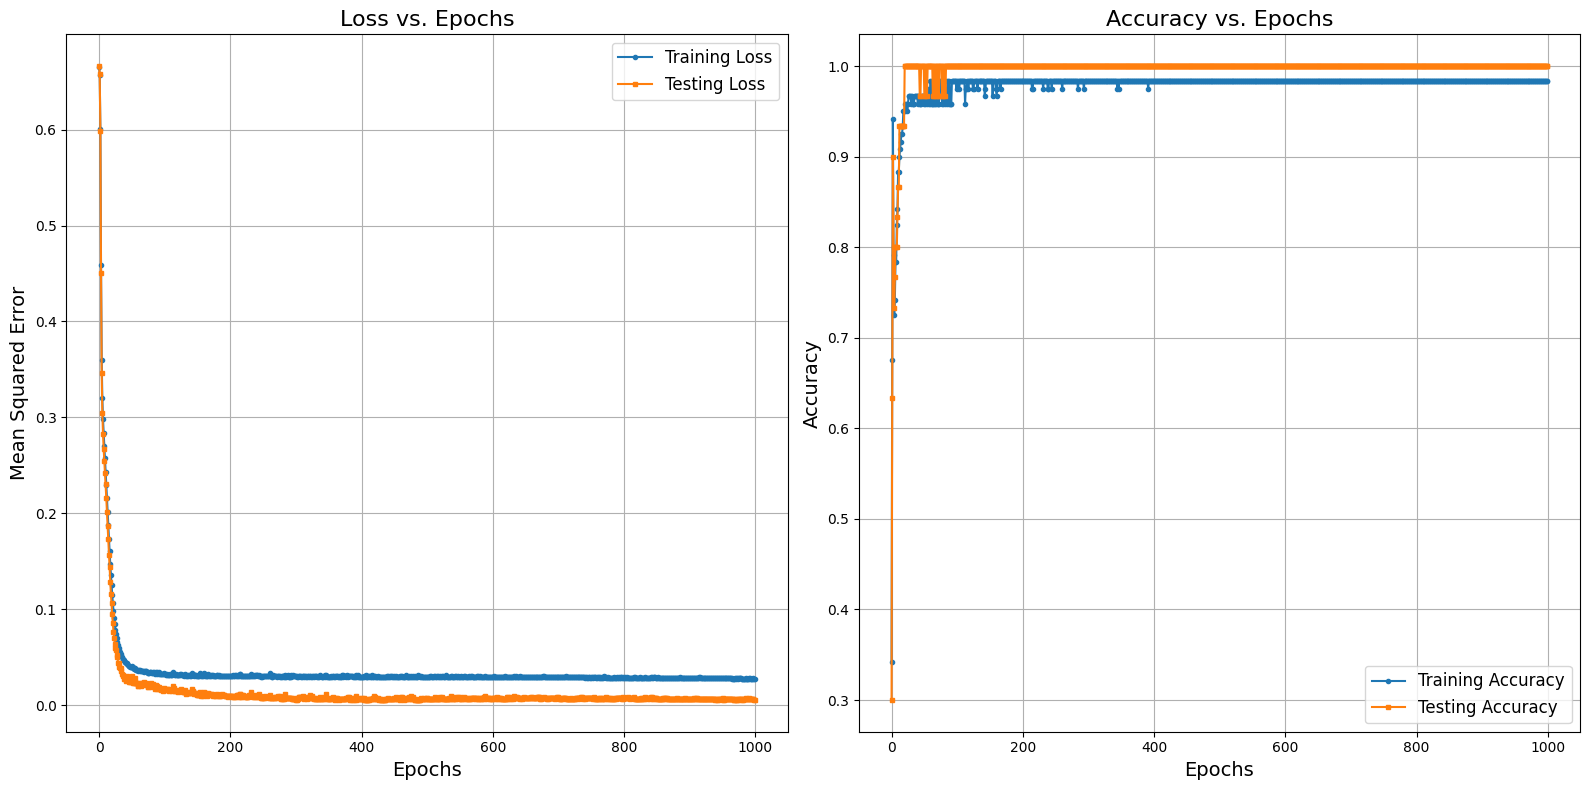

In [2]:
'''
230191
EE708 Assignment 5
QUESTION 8
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#Converting y to one-hot encoding
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

y_one_hot = one_hot_encode(y, 3)  #As Iris has 3 classes

#Splitting the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

#Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        #Initializing weights and biases randomly
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2

    def softmax(self, x):
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def forward(self, X):
        #Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def compute_loss(self, y_true, y_pred):
        #Mean Squared Error
        return np.mean(np.sum((y_true - y_pred)**2, axis=1))

    def backward(self, X, y, output):
        m = X.shape[0]  #Number of examples

        #Output layer: derivative for MSE with softmax
        delta2 = output - y

        #Hidden layer
        delta1 = np.dot(delta2, self.W2.T) * self.tanh_derivative(self.z1)

        #Updation of weights and biases
        self.W2 -= self.learning_rate * np.dot(self.a1.T, delta2) / m
        self.b2 -= self.learning_rate * np.sum(delta2, axis=0, keepdims=True) / m
        self.W1 -= self.learning_rate * np.dot(X.T, delta1) / m
        self.b1 -= self.learning_rate * np.sum(delta1, axis=0, keepdims=True) / m

    def train(self, X_train, y_train, X_test, y_test, epochs=1000):
        train_losses = []
        train_accuracies = []
        test_losses = []
        test_accuracies = []

        n_samples = X_train.shape[0]

        for epoch in range(epochs):
            #Shuffling the training data
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            #Stochastic Gradient Descent (one example at a time)
            for i in range(n_samples):
                X_i = X_shuffled[i:i+1]  #Single example
                y_i = y_shuffled[i:i+1]  #Single label

                #Forward pass
                output = self.forward(X_i)
                #Backward pass
                self.backward(X_i, y_i, output)

            #training loss and accuracy
            train_pred = self.forward(X_train)
            train_loss = self.compute_loss(y_train, train_pred)
            train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(y_train, axis=1))

            #testing loss and accuracy
            test_pred = self.forward(X_test)
            test_loss = self.compute_loss(y_test, test_pred)
            test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(y_test, axis=1))

            #Stored metrics
            train_losses.append(train_loss)
            train_accuracies.append(train_acc)
            test_losses.append(test_loss)
            test_accuracies.append(test_acc)

            #Printing progress for every epoch
            print(f"Epoch {epoch+1:04d}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

        return train_losses, train_accuracies, test_losses, test_accuracies

#Creating the neural network
input_size = X_train.shape[1]  #4 features in Iris dataset
hidden_size = 5  #5 neurons in hidden layer
output_size = 3  #3 classes in Iris dataset

#Initializing and training the network
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.01)
train_losses, train_accuracies, test_losses, test_accuracies = nn.train(X_train, y_train, X_test, y_test, epochs=1000)

#Plotting the results with a larger, more detailed figure
plt.figure(figsize=(16, 8))

#Plotting loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, 'o-', label='Training Loss', markersize=3)
plt.plot(test_losses, 's-', label='Testing Loss', markersize=3)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Loss vs. Epochs', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

#Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'o-', label='Training Accuracy', markersize=3)
plt.plot(test_accuracies, 's-', label='Testing Accuracy', markersize=3)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs. Epochs', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()
